In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interp_table import InterpTable

## Test 1: a 2D interpolation with out of bound values

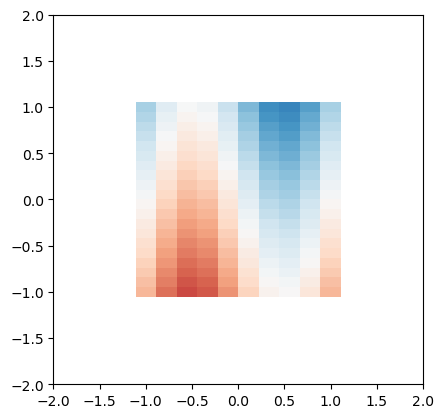

In [2]:
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,20)
z = np.sin(x[None,:]*np.pi) + y[:,None]
plt.pcolormesh(x, y, z, cmap='RdBu', vmin=-3, vmax=3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal','box')

In [3]:
T = InterpTable()
T.add_grid('y',y)
T.add_grid('x',x)
T.add_data('z')
T.data['z'] = z
T.create_interp_fn_all_data()

In [4]:
x2 = np.linspace(-2,2,50)
y2 = np.linspace(-2,2,60)
y2, x2 = np.meshgrid(y2, x2, indexing='ij')
z2 = T.interp('z', x=x2, y=y2).reshape(x2.shape)

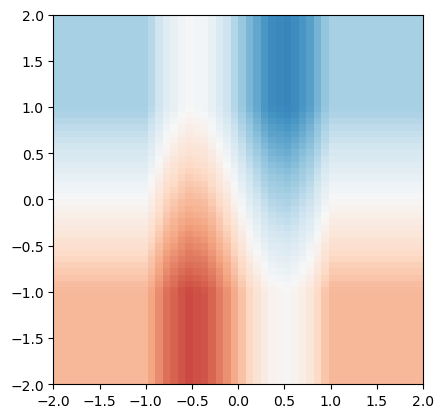

In [5]:
plt.pcolormesh(x2, y2, z2, cmap='RdBu', vmin=-3, vmax=3)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal','box')

In [6]:
# will get error for scalar input...
print(T.interp('z', x=np.array([0]), y=np.array([1])))
# but we have a wrapper
print(T.interp_scalar('z',x=0,y=1))

[1.]
1.0


## Test 2: a log-log interpolation

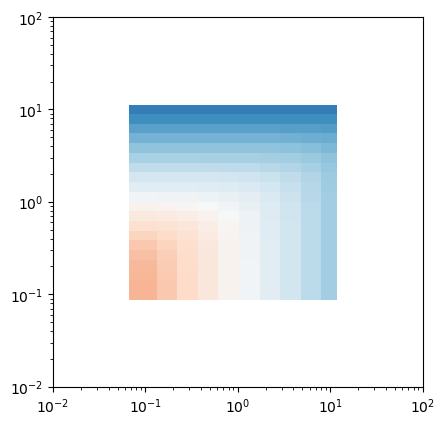

In [7]:
x = np.logspace(-1,1,10)
y = np.logspace(-1,1,20)
z = x[None,:]**1.5 + y[:,None]**3
plt.pcolormesh(x, y, np.log(z), cmap='RdBu', vmin=-10, vmax=10)
plt.xscale('log'); plt.yscale('log')
plt.xlim(1e-2,1e2)
plt.ylim(1e-2,1e2)
plt.gca().set_aspect('equal','box')

In [8]:
T = InterpTable()
T.add_grid('logy',np.log(y))
T.add_grid('logx',np.log(x))
T.add_data('logz')
T.data['logz'] = np.log(z)
T.create_interp_fn_all_data()

In [9]:
x2 = np.logspace(-2,2,50)
y2 = np.logspace(-2,2,60)
y2, x2 = np.meshgrid(y2, x2, indexing='ij')
z2 = T.interp('logz', logx=x2, logy=y2, loglog=True).reshape(x2.shape)

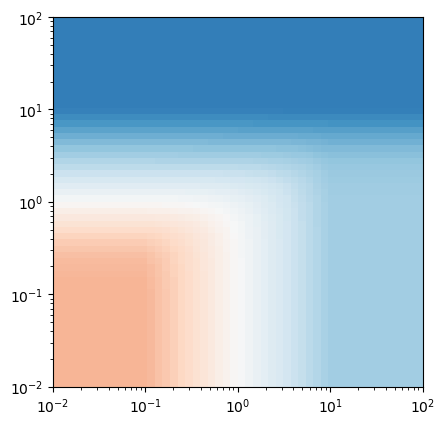

In [10]:
plt.pcolormesh(x2, y2, np.log(z2), cmap='RdBu', vmin=-10, vmax=10)
plt.xscale('log'); plt.yscale('log')
plt.xlim(1e-2,1e2)
plt.ylim(1e-2,1e2)
plt.gca().set_aspect('equal','box')

In [11]:
T

InterpTable object with 2 dims
Axes:
  [0] logy, length=20
  [1] logx, length=10
Data fields, shape=[20, 10]:
  logz

In [12]:
# the interpolation table can be dumped with pickle
# import pickle
# pickle.dump(T, open('test_interp.pkl', 'wb'))

# Test 3: cut on an axis

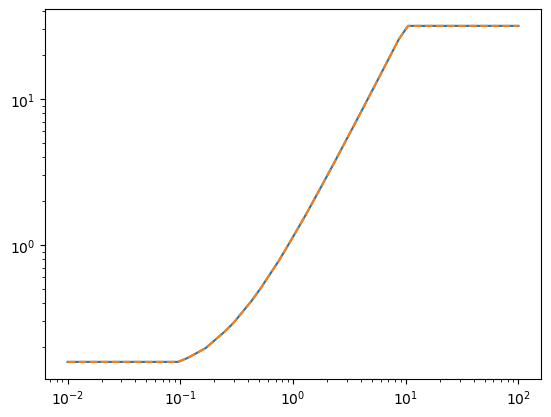

In [14]:
T_new = T.replace_grid('logy', np.log(0.5))
x3 = np.logspace(-2,2,50)
z3 = T.interp('logz', logx=x3, logy=np.ones_like(x3)*0.5, loglog=True)
z3_new = T_new.interp('logz', logx=x3, loglog=True)
plt.plot(x3, z3)
plt.plot(x3, z3_new, '--')
plt.xscale('log')
plt.yscale('log')